# Aplicação do kmeans

#### Importando bibliotecas necessárias

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import joblib
import copy


#### Ajustes nos parametros para visualização dos dados

In [37]:
# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


#### Importando o dataset coletado

In [38]:
file_path = '17_09_24_openaq_data.parquet'
df = pd.read_parquet(file_path)


# Visualizando os primeiros registros
df.head()


,location,city,country,latitude,longitude,pm25 (µg/m³),pm25_lastUpdated,pm10 (µg/m³),pm10_lastUpdated,pm1 (µg/m³),...,o3 (ppm),so2 (ppm),no2 (ppm),co (ppm),no (ppm),no_lastUpdated,nox (ppm),nox_lastUpdated,bc (µg/m³),bc_lastUpdated
0,Siavonga,None,ZM,-16.541315,28.707835,59.741667,2024-09-17T05:00:00+00:00,70.262499,2024-09-17T05:00:00+00:00,39.225000,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
1,Siavonga Harbour 2,None,ZM,-16.541213,28.708111,46.933334,2024-09-17T05:00:00+00:00,56.854166,2024-09-17T05:00:00+00:00,30.845834,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
2,"CAP / UPS, KZN, ZA.",None,ZA,-29.474064,31.217176,7.583036,2024-09-17T05:00:00+00:00,7.916518,2024-09-17T05:00:00+00:00,4.319643,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
3,PTA-NORTH,None,ZA,-25.681506,28.156085,47.141667,2024-09-17T05:00:00+00:00,58.783333,2024-09-17T05:00:00+00:00,27.145833,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None
4,"CAP / MOR1, KZN, ZA",None,ZA,-29.835083,31.007639,22.915178,2024-09-17T05:00:00+00:00,7.207540,2024-03-09T19:00:00+00:00,4.688889,...,NaN,NaN,NaN,NaN,NaN,None,NaN,None,NaN,None


#### Visualizando os dados antes de aplicar o k-means

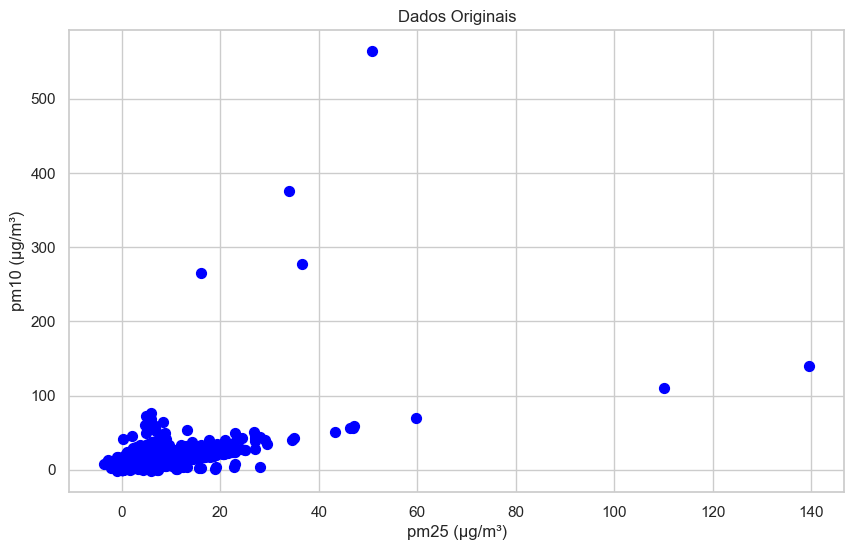

In [39]:
# Visualizando os dados antes do K-Means
plt.scatter(df['pm25 (µg/m³)'], df['pm10 (µg/m³)'], c='blue', marker='o', s=50)
plt.title("Dados Originais")
plt.xlabel("pm25 (µg/m³)")
plt.ylabel("pm10 (µg/m³)")
plt.show()


#### Separa as informações que serão aproveitadas do dataset

In [40]:
				
df = df[['pm25 (µg/m³)','pm10 (µg/m³)']]

df = df.dropna()

##### Aplica o k-means com o numero de clustes em 3 (chute)

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


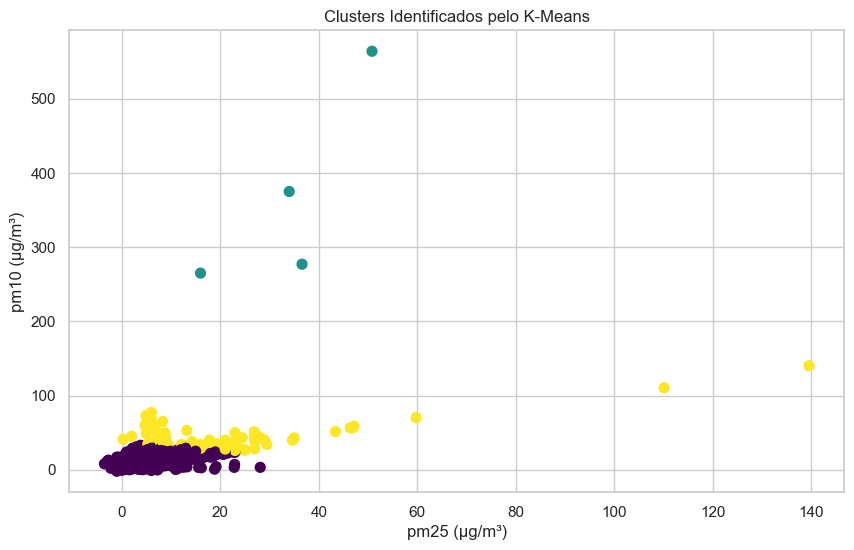

In [41]:
# Aplicando o K-Means


kmeans = KMeans(n_clusters=3, random_state=42)  # Tentando com 3 clusters inicialmente
result = copy.deepcopy(df)
result['Cluster'] = kmeans.fit_predict(df)

# Visualizando os clusters formados
plt.scatter(df['pm25 (µg/m³)'], df['pm10 (µg/m³)'], c=result['Cluster'], cmap='viridis', marker='o', s=50)
plt.title("Clusters Identificados pelo K-Means")
plt.xlabel("pm25 (µg/m³)")
plt.ylabel("pm10 (µg/m³)")
plt.show()


#### Analisando pelo método do cotovelo (elbow method) o melhor número de clusters

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

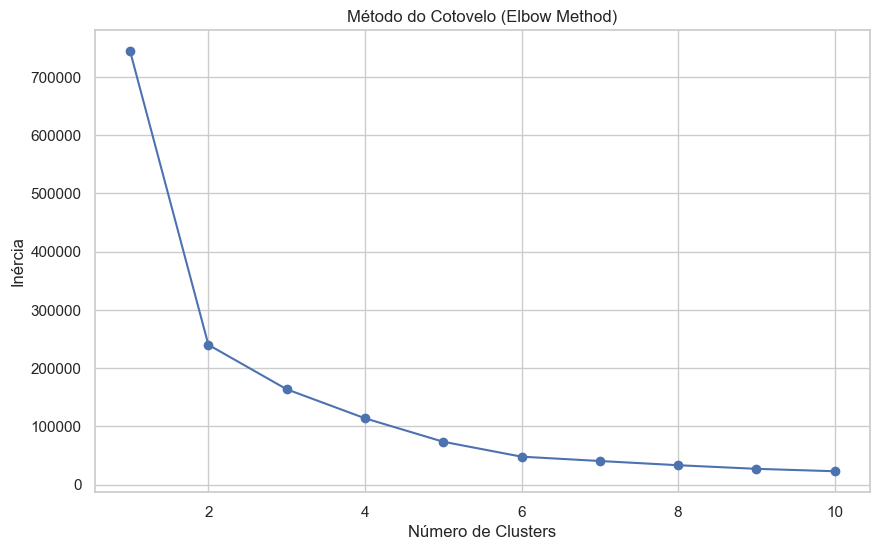

In [42]:
inertia = []
K = range(1, 11)  # Tentando de 1 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(K, inertia, 'bo-')
plt.title("Método do Cotovelo (Elbow Method)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

##### Como verificado, o melhor numero de clusters está entre 3 e 4, vamos usar **4**

c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


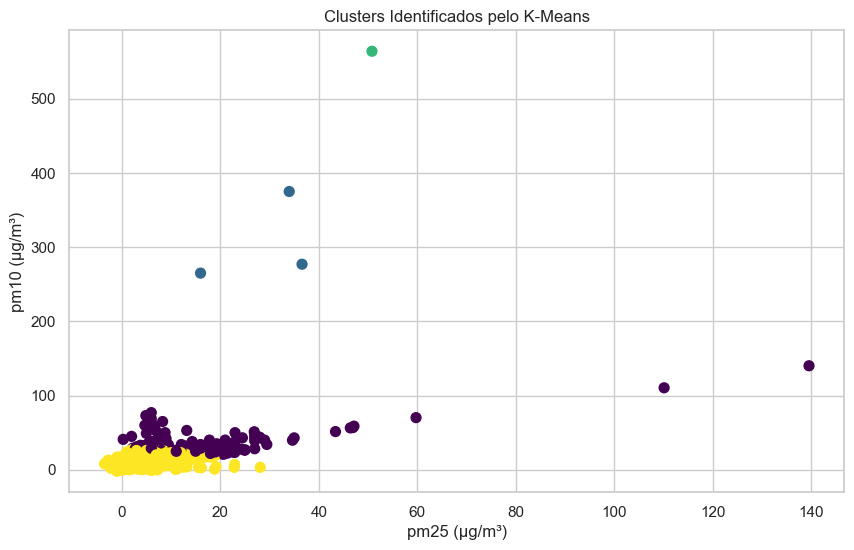

In [43]:
# Aplicando o K-Means
kmeans = KMeans(n_clusters=4, random_state=42) 
result = kmeans.fit_predict(df)

# Visualizando os clusters formados
plt.scatter(df['pm25 (µg/m³)'], df['pm10 (µg/m³)'], c=result, cmap='viridis', marker='o', s=50)
plt.title("Clusters Identificados pelo K-Means")
plt.xlabel("pm25 (µg/m³)")
plt.ylabel("pm10 (µg/m³)")
plt.show()

##### Exportando o modelo treinado

In [44]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']